## Part 1

### generic to be followed - 
1. getting the input features and the target 
2. designing the hidden layers
3. sending in the data 
4. performing the predictions 
5. figuring out the loss 
6. SDG and optimizing the parms
7. monituring the loss.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
class ANN_from_scratch():
    relu= np.vectorize(lambda x: max(0, x))
    sigmoid=np.vectorize(lambda z:  1 / (1 + np.exp(-z)))
    sigmoid_dash=np.vectorize(lambda z: ANN_from_scratch.sigmoid(z)*(1-ANN_from_scratch.sigmoid(z)))
    relu_dash=np.vectorize(lambda x: 1 if x > 0 else 0)
    def __init__(self,features,y_actual):
        self.features=features
        self.y=y_actual
    def ann(self):
        in_size=2
        hidden=50
        output=1

        #defining the weights
        w1=np.random.randn(in_size, hidden)
        b1 = np.zeros((1, hidden))
        w2=np.random.randn(hidden,output)
        b2=np.zeros((1, output))

        # Hyperparameters
        learning_rate = 0.01
        num_epochs = 10000

        #training 
        for epoch in range(num_epochs):
        # Forward pass working on neuron.
            Z1 =self.features @ w1+ b1
            A1 = ANN_from_scratch.relu(Z1)
            #A1_reshaped=A1.reshape(-1,1)
            Z2 = A1 @ w2 + b2
            self.y_pred_nn = Z2

            loss = np.mean((self.y_pred_nn - self.y.reshape(-1, 1)) ** 2)

            #backward pass 
            dZ2 = self.y_pred_nn - self.y.reshape(-1, 1) 
            dW2 = A1.T @ dZ2 / self.features.shape[0]
            db2 = np.mean(dZ2, axis=0, keepdims=True)
            
            dA1 = dZ2 @ w2.T
            dZ1 = dA1 * ANN_from_scratch.relu_dash(Z1)
            dW1 = self.features.T @ dZ1 / self.features.shape[0]
            db1 = np.mean(dZ1, axis=0, keepdims=True)
             # Update parameters
            w1 -= learning_rate * dW1
            b1 -= learning_rate * db1
            w2 -= learning_rate * dW2
            b2 -= learning_rate * db2

            # Print loss every 1000 epochs
            if epoch % 1000 == 0:
                print(f'Epoch {epoch}, Loss: {loss}')
        #2d plot for the price of house dataset.
        fig2 = plt.figure()
        ax2 = fig2.add_subplot(111, projection='3d')
        ax2.scatter(self.features[:, 0], self.features[:, 1], self.y, label='Actual Data', c='b')
        ax2.scatter(self.features[:, 0], self.features[:, 1], self.y_pred_nn, label='Predicted Data', c='r')
        ax2.set_xlabel('Feature 1 (RM)')
        ax2.set_ylabel('Feature 2 (AGE)')
        ax2.set_zlabel('Target (MEDV)')
        ax2.legend()
        plt.title('Neural Network Predictions vs Actual Data')
        plt.show()

        #plt.scatter(self.features, self.y, label='Data')
        #plt.plot(self.features, self.y_pred_nn, color='green', label='Neural Network')
        #plt.xlabel('x')
        #plt.ylabel('y')
        #plt.legend()
        #plt.show()

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
# Load the dataset, boston housing data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
column_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
    'PTRATIO', 'B', 'LSTAT', 'MEDV'
]
df = pd.read_csv(url, delim_whitespace=True, names=column_names)
scale=StandardScaler()
features = ['RM', 'AGE']  # Use multiple features
X = scale.fit_transform(df[features].values)
Y= df['MEDV'].values  # The target values (house prices)

Epoch 0, Loss: 592.0430820081077
Epoch 1000, Loss: 37.995817726680094
Epoch 2000, Loss: 37.56039963189614
Epoch 3000, Loss: 36.83340625714535
Epoch 4000, Loss: 35.44475049256754
Epoch 5000, Loss: 34.30479525593741
Epoch 6000, Loss: 33.673454228270025
Epoch 7000, Loss: 33.424923492547066
Epoch 8000, Loss: 33.29130028690325
Epoch 9000, Loss: 33.25627251747059


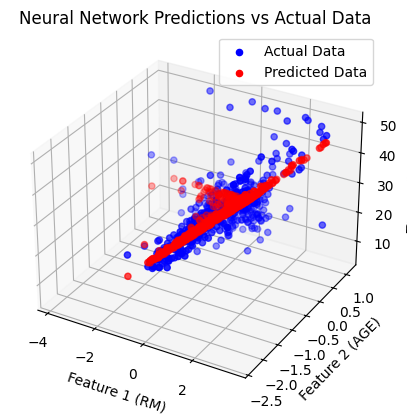

In [14]:
#with one neuron, 2 features and relu activation - this is the actual task 1 rest is just playing around with different numbers and functios.
ann1=ANN_from_scratch(X,Y)
ann1.ann()

Epoch 0, Loss: 476.4420551908253
Epoch 1000, Loss: 31.89875161610293
Epoch 2000, Loss: 30.833163730872982
Epoch 3000, Loss: 29.736929859703032
Epoch 4000, Loss: 29.518179980052004
Epoch 5000, Loss: 29.507028868916382
Epoch 6000, Loss: 28.803290231846052
Epoch 7000, Loss: 29.035483694331344
Epoch 8000, Loss: 29.668891013712607
Epoch 9000, Loss: 29.052082699110503


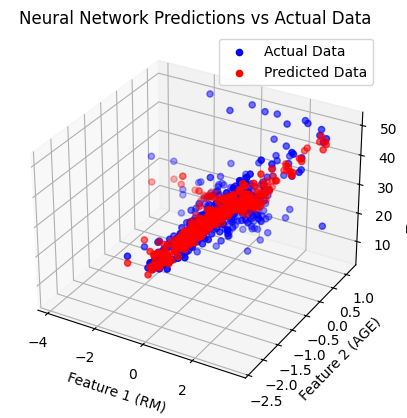

In [16]:
ann100=ANN_from_scratch(X,Y)
ann100.ann()

Epoch 0, Loss: 631.2901199593229
Epoch 1000, Loss: 29.241115673215727
Epoch 2000, Loss: 28.887148350207166
Epoch 3000, Loss: 28.60532252981696
Epoch 4000, Loss: 28.402498066280735
Epoch 5000, Loss: 28.243573962508346
Epoch 6000, Loss: 28.108076433422344
Epoch 7000, Loss: 28.00432415132274
Epoch 8000, Loss: 27.908101822476972
Epoch 9000, Loss: 27.824438259564758


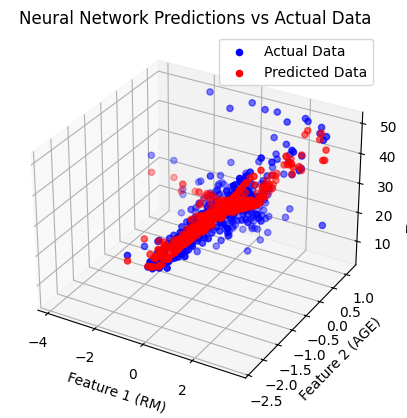

In [20]:
ann01=ANN_from_scratch(X,Y)
ann01.ann()

# Task 2 - experimentation

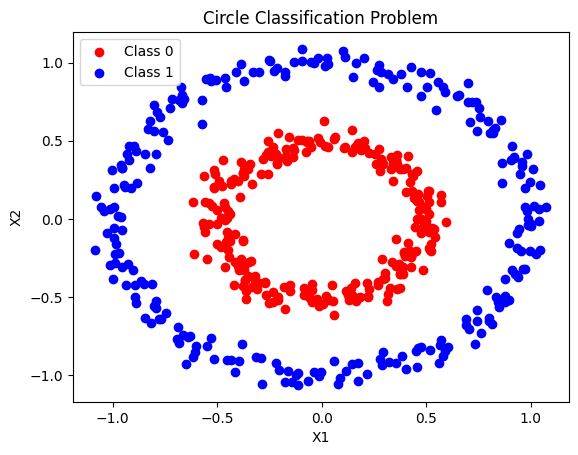

In [13]:
from sklearn.datasets import make_circles
import torch
import torch.nn as nn
import torch.optim as optim
# Logistic Regression Model in Pytorch
class LogisticRegressionModel(nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(2, 1)
    
    def forward(self, x):
        return torch.sigmoid(self.linear(x))
    
# Generate circle classification problem data
X, y = make_circles(n_samples=500, factor=0.5, noise=0.05)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# Plot the data
plt.scatter(X[y.squeeze() == 1][:, 0], X[y.squeeze() == 1][:, 1], color='red', label='Class 0')
plt.scatter(X[y.squeeze() == 0][:, 0], X[y.squeeze() == 0][:, 1], color='blue', label='Class 1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.title('Circle Classification Problem')
plt.show()

# Initialize the model, loss function, and optimizer
logistic_model = LogisticRegressionModel()
criterion = nn.BCELoss()
optimizer = optim.SGD(logistic_model.parameters(), lr=0.1)

# Train the model
epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad() # Clears the previous gradient, since we donot want to accumulate the gradients
    outputs = logistic_model(X)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()

In [14]:
# Evaluate the model
with torch.no_grad():  # no_grad ensures that parameters are not updated while testing the model
    y_pred_log_reg = (logistic_model(X) > 0.5).float()
    accuracy_log_reg = (y_pred_log_reg == y).sum().item() / y.size(0)
    print(f"Logistic Regression Accuracy: {accuracy_log_reg:.2f}")      

Logistic Regression Accuracy: 0.51


the 50% accuracy tells us that it'll only stretch a linear boundary and classify the points accordingly, and hence will not be able to perform circular classification.

# Part 3 
#### Regression Model:

- **Input Layer**: 1 feature
- **Hidden Layers**: 2 hidden layers, each with 10 neurons, ReLU activation
- **Output Layer**: 1 neuron, Linear activation

- Implement this model using PyTorch.
- Train the model on synthetic data.


In [23]:
# Simple neural network to perform regression
class RegressionNN(nn.Module):
    def __init__(self):
        super(RegressionNN, self).__init__()
        self.fc1 = nn.Linear(1, 10) #input layer
        self.relu1 = nn.ReLU()#activation of the first hidden layer
        self.fc2 = nn.Linear(10, 1)# connections between the 1st and 2nd hidden layer.
        self.relu2 = nn.ReLU()# activation for the last hidden layer.
        self.fc3 = nn.Linear(1, 1)# output layer


    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x


In [24]:
model = RegressionNN()
# Loss function 
criterion = nn.MSELoss()

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)
x_train = torch.randn(100, 1)
y_train = torch.randn(100, 1)

In [28]:
num_epochs = 10000
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode

    # Forward pass
    outputs = model(x_train)
    loss = criterion(outputs, y_train)
    
    # Backward pass and optimization
    optimizer.zero_grad()  # Clear the gradients
    loss.backward()        # Compute gradients
    optimizer.step()       # Update the weights

    # Print loss every 100 epochs
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [100/10000], Loss: 0.9740
Epoch [200/10000], Loss: 0.9740
Epoch [300/10000], Loss: 0.9740
Epoch [400/10000], Loss: 0.9740
Epoch [500/10000], Loss: 0.9740
Epoch [600/10000], Loss: 0.9740
Epoch [700/10000], Loss: 0.9740
Epoch [800/10000], Loss: 0.9739
Epoch [900/10000], Loss: 0.9739
Epoch [1000/10000], Loss: 0.9739
Epoch [1100/10000], Loss: 0.9739
Epoch [1200/10000], Loss: 0.9739
Epoch [1300/10000], Loss: 0.9739
Epoch [1400/10000], Loss: 0.9739
Epoch [1500/10000], Loss: 0.9739
Epoch [1600/10000], Loss: 0.9739
Epoch [1700/10000], Loss: 0.9739
Epoch [1800/10000], Loss: 0.9739
Epoch [1900/10000], Loss: 0.9739
Epoch [2000/10000], Loss: 0.9739
Epoch [2100/10000], Loss: 0.9739
Epoch [2200/10000], Loss: 0.9739
Epoch [2300/10000], Loss: 0.9739
Epoch [2400/10000], Loss: 0.9739
Epoch [2500/10000], Loss: 0.9739
Epoch [2600/10000], Loss: 0.9739
Epoch [2700/10000], Loss: 0.9739
Epoch [2800/10000], Loss: 0.9739
Epoch [2900/10000], Loss: 0.9739
Epoch [3000/10000], Loss: 0.9739
Epoch [3100/10000],

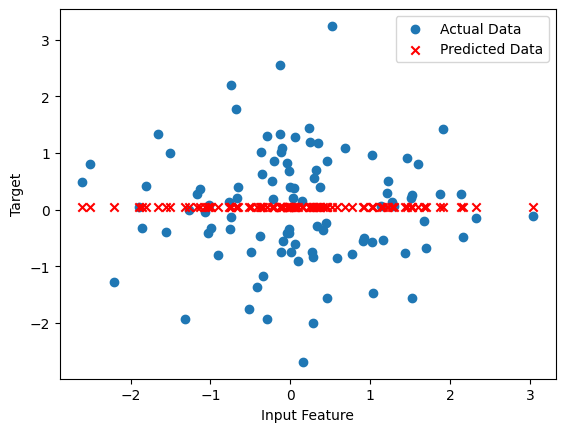

In [29]:
import matplotlib.pyplot as plt

model.eval()  # Set the model to evaluation mode
with torch.no_grad():  # Disable gradient calculation
    predictions = model(x_train).detach().numpy()
    actual = y_train.numpy()

plt.scatter(x_train.numpy(), actual, label='Actual Data')
plt.scatter(x_train.numpy(), predictions, label='Predicted Data', color='r', marker='x')
plt.xlabel('Input Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

In [37]:
model2=RegressionNN()
X_regg = scale.fit_transform(df[['RM']].values)
y_regg=y = df['MEDV'].values

num_epochs = 10000
for epoch in range(num_epochs):
    model2.train()  # Set the model to training mode

    # Forward pass
    outputs1 = model(torch.tensor(X_regg, dtype=torch.float32))
    loss = criterion(outputs1, torch.tensor(y_regg, dtype=torch.float32))
    
    # Backward pass and optimization
    optimizer.zero_grad()  # Clear the gradients
    loss.backward()        # Compute gradients
    optimizer.step()       # Update the weights

    # Print loss every 100 epochs
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


c:\Users\Ankit\miniconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([506])) that is different to the input size (torch.Size([506, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [100/10000], Loss: 84.4195
Epoch [200/10000], Loss: 84.4196
Epoch [300/10000], Loss: 84.4195
Epoch [400/10000], Loss: 84.4196
Epoch [500/10000], Loss: 84.4196
Epoch [600/10000], Loss: 84.4196
Epoch [700/10000], Loss: 84.4196
Epoch [800/10000], Loss: 84.4195
Epoch [900/10000], Loss: 84.4196
Epoch [1000/10000], Loss: 84.4195
Epoch [1100/10000], Loss: 84.4196
Epoch [1200/10000], Loss: 84.4195
Epoch [1300/10000], Loss: 84.4196
Epoch [1400/10000], Loss: 84.4195
Epoch [1500/10000], Loss: 84.4196
Epoch [1600/10000], Loss: 84.4195
Epoch [1700/10000], Loss: 84.4196
Epoch [1800/10000], Loss: 84.4195
Epoch [1900/10000], Loss: 84.4195
Epoch [2000/10000], Loss: 84.4196
Epoch [2100/10000], Loss: 84.4195
Epoch [2200/10000], Loss: 84.4195
Epoch [2300/10000], Loss: 84.4195
Epoch [2400/10000], Loss: 84.4195
Epoch [2500/10000], Loss: 84.4196
Epoch [2600/10000], Loss: 84.4196
Epoch [2700/10000], Loss: 84.4196
Epoch [2800/10000], Loss: 84.4196
Epoch [2900/10000], Loss: 84.4196
Epoch [3000/10000], Los

## doubt - why is the loss oscillating in this case?

#### Multiclass Classification Model:

- **Input Layer**: 2 features
- **Hidden Layers**: 2 hidden layers, first hidden layer with 50 neurons and second hidden layer with 25 neurons, ReLU activation
- **Output Layer**: 5 neurons, Linear activation

- Implement this model using PyTorch.
- Train the model on synthetic data.
    

In [39]:
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 50)
        self.fc2 = nn.Linear(50, 25)
        self.fc3 = nn.Linear(25, 5)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        return x


[Epoch 1, Batch 100] loss: 1.640
[Epoch 1, Batch 200] loss: 1.595
[Epoch 1, Batch 300] loss: 1.649
[Epoch 1, Batch 400] loss: 1.615
[Epoch 1, Batch 500] loss: 1.590
[Epoch 1, Batch 600] loss: 1.632
[Epoch 1, Batch 700] loss: 1.615
[Epoch 1, Batch 800] loss: 1.617
[Epoch 1, Batch 900] loss: 1.629
[Epoch 1, Batch 1000] loss: 1.614
[Epoch 2, Batch 100] loss: 1.616
[Epoch 2, Batch 200] loss: 1.600
[Epoch 2, Batch 300] loss: 1.635
[Epoch 2, Batch 400] loss: 1.615
[Epoch 2, Batch 500] loss: 1.581
[Epoch 2, Batch 600] loss: 1.625
[Epoch 2, Batch 700] loss: 1.610
[Epoch 2, Batch 800] loss: 1.615
[Epoch 2, Batch 900] loss: 1.624
[Epoch 2, Batch 1000] loss: 1.611
[Epoch 3, Batch 100] loss: 1.614
[Epoch 3, Batch 200] loss: 1.599
[Epoch 3, Batch 300] loss: 1.633
[Epoch 3, Batch 400] loss: 1.612
[Epoch 3, Batch 500] loss: 1.581
[Epoch 3, Batch 600] loss: 1.621
[Epoch 3, Batch 700] loss: 1.609
[Epoch 3, Batch 800] loss: 1.617
[Epoch 3, Batch 900] loss: 1.621
[Epoch 3, Batch 1000] loss: 1.610
[Epoch 

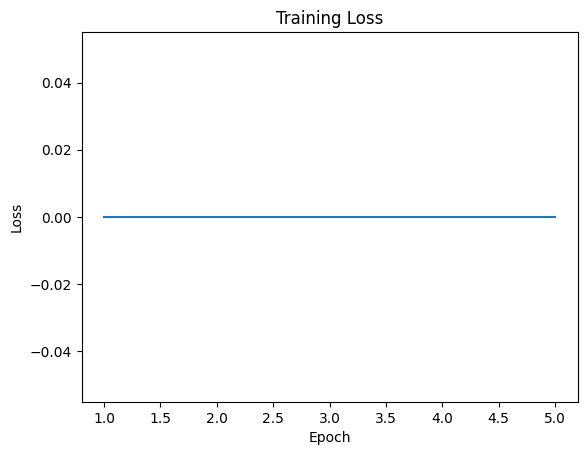

In [50]:
multiclss=Net()
criterion_multi = nn.CrossEntropyLoss()
optimizer = optim.SGD(multiclss.parameters(), lr=0.001, momentum=0.9)

# defining data
num_samples = 1000
num_features = 2
features = np.random.randn(num_samples, num_features) 
num_classes = 5
labels = np.random.randint(0, num_classes, size=num_samples)
dataset = list(zip(features, labels))  # Combine features and labels into a list of tuples

num_epochs = 5

# Store loss values during training
losses = []

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (x, label) in enumerate(dataset, 0):  # Unpack features and label from each tuple
        optimizer.zero_grad()
        outputs = multiclss(torch.tensor(x).float())  # Convert features to tensor
        loss = criterion_multi(outputs, torch.tensor(label).long())  # Convert labels to tensor
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:  # Print every 100 mini-batches
            print(f'[Epoch {epoch + 1}, Batch {i + 1}] loss: {running_loss / 100:.3f}')
            running_loss = 0.0

    # Append the average loss for the epoch to the losses list
    losses.append(running_loss / len(dataset))

print('Finished Training')

# Plot the loss curve
plt.plot(range(1, num_epochs + 1), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()


# doubt - why is loss a striaght line, which it clearly dosent look like from the values printed?